# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
plt.rcParams['figure.figsize'] = [15, 5]

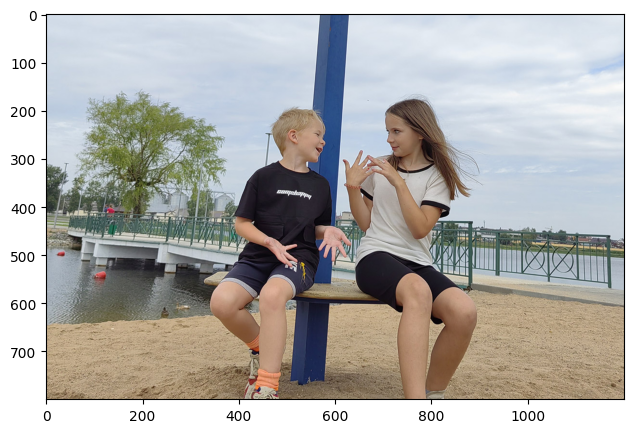

In [39]:
img = cv2.imread('C:/Users/DenysK/PycharmProjects/AI/images/children.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<Axes: >, <matplotlib.image.AxesImage at 0x227a5f5c080>)

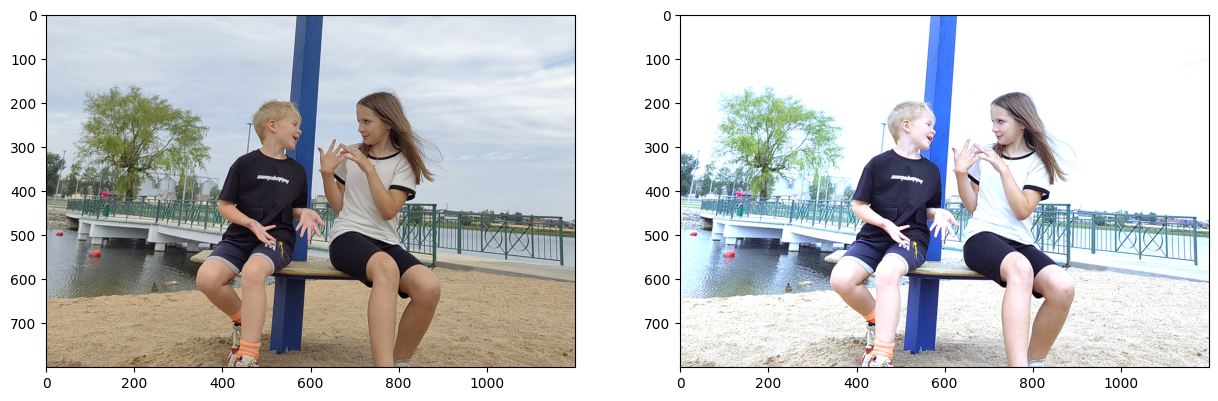

In [40]:
# Define white patch and the coefficients
row, col = 712, 413 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

In [3]:
def color_balance(image, balance):
    image2 = np.zeros(image.shape)
    image2[:,:,0] = ((1 + 2*balance)*image[:,:,0] + (1 - balance)*image[:,:,1] + (1 - balance)*image[:,:,2])/3
    image2[:,:,1] = ((1 + 2*balance)*image[:,:,1] + (1 - balance)*image[:,:,0] + (1 - balance)*image[:,:,2])/3
    image2[:,:,2] = ((1 + 2*balance)*image[:,:,2] + (1 - balance)*image[:,:,0] + (1 - balance)*image[:,:,1])/3
    image2 = image2/255
    return image2

### Gray world
This algorithm assumes that a scene, on average, is gray.

Mean Red: 104.80307217630855
Mean Green: 125.56111239669421
Mean Blue: 131.2226997245179
kr: 1.25208829282947
kg: 1.0450902928443053
kb: 1


(<Axes: >, <matplotlib.image.AxesImage at 0x227abc9e7b0>)

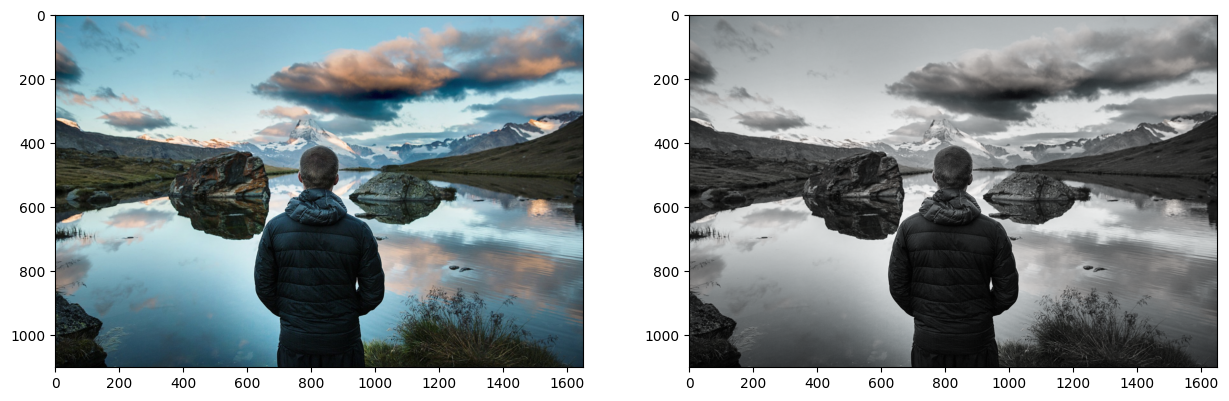

In [41]:
# Load your image
img = cv2.imread('D:/AI_learning/images/natures.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[:, :, 0])
mean_g = np.mean(img[:, :, 1])
mean_b = np.mean(img[:, :, 2]) 


print("Mean Red:", mean_r)
print("Mean Green:", mean_g)
print("Mean Blue:", mean_b)

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
kr = mean_b / mean_r
kg = mean_b / mean_g
kb = 1

print("kr:", kr)
print("kg:", kg)
print("kb:", kb)

# Apply color balancing and generate the balanced image
balanced = color_balance(img, 0.1)

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

In [8]:
# Load your image
img = cv2.imread('images/children.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img[:, :, 0])
max_g = np.max(img[:, :, 1])
max_b = np.max(img[:, :, 2])

print("RED:", max_r)
print("GREEN:", max_g)
print("BLUE:", max_b)

# # Apply scale-by-max balancing and generate the balanced image
balanced = color_balance(img, 1.0)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
